In [1]:
import pandas as pd
#행렬 연산 패키지
import numpy as np

#데이터 시각화
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 


# 의사결정나무

In [10]:
#나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
#나무 구조 시각화
import graphviz

#데이터 분할: train, test
from sklearn.model_selection import train_test_split
#예측/회귀 Decision test
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
#나무 구조 시각화
import graphviz
import os


os.environ['PATH'] += os.pathsep + 'C:\Program Files (x86)/Graphviz2.38/bin'

In [11]:
model_2 = pd.read_excel('C:/Users/chhch/OneDrive/Documents/POSTECH/빅데이터프로젝트/model2_dataset.xlsx',sheet_name='Sheet1')
model_2.head()

,customer_id,insu_risk_expense,gender,age,bmi,waist,bp_min,bp_max,risk
0,C117780,194376.0,M,50,23.939481,83.0,85,130,0
1,C117780,-1869370.0,M,50,23.939481,83.0,85,130,1
2,C121178,-913949.0,M,30,24.816327,86.0,80,125,1
3,C116605,-1813374.0,M,50,26.259585,88.0,80,130,1
4,C129391,-4495124.0,F,35,19.227688,72.0,80,120,1
...,...,...,...,...,...,...,...,...,...
4752,C114658,-2521120.0,M,55,19.045073,74.0,70,120,1
4753,C117461,815720.0,M,50,26.423570,88.0,70,110,0
4754,C123990,331180.0,F,55,20.569330,85.0,80,120,0
4755,C126693,-1597780.0,F,50,22.718974,73.0,80,120,1


In [12]:
model_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4757 entries, 0 to 4756
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        4757 non-null   object 
 1   insu_risk_expense  4757 non-null   float64
 2   gender             4757 non-null   object 
 3   age                4757 non-null   int64  
 4   bmi                4757 non-null   float64
 5   waist              4757 non-null   float64
 6   bp_min             4757 non-null   int64  
 7   bp_max             4757 non-null   int64  
 8   risk               4757 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 334.6+ KB


In [13]:
model_2 = pd.get_dummies(model_2.drop('customer_id', axis=1))

In [16]:
model_2_y = model_2['risk']
model_2_x = model_2.drop(['insu_risk_expense','risk'], axis=1, inplace = False)

In [17]:
df_train_x, df_test_x, df_train_y,df_test_y = train_test_split(model_2_x, model_2_y,\
                                               test_size = 0.3, random_state = 1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data X size : {}'.format(df_test_y.shape))

train data X size : (3329, 7)
train data Y size : (3329,)
test data X size : (1428, 7)
test data X size : (1428,)


In [18]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on traing set: {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set: {:.3f}'.format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on traing set: 0.961
Score on test set: 0.540


In [19]:
tree_uncustomized

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [20]:
train_score = []; test_score=[]

para_depth = [depth for  depth in range(1,14)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state = 1234, max_depth= v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth']= para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.533,0.557
1,2,0.545,0.550
2,3,0.552,0.562
3,4,0.558,0.548
4,5,0.568,0.539
5,6,0.576,0.523
6,7,0.593,0.535
7,8,0.612,0.539
8,9,0.630,0.541
9,10,0.654,0.529


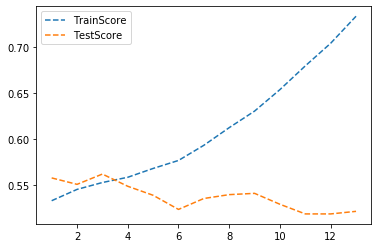

In [21]:
plt.plot(para_depth, train_score, linestyle = '--', label = 'TrainScore' )
plt.plot(para_depth, test_score, linestyle = '--', label = 'TestScore' )
plt.legend()

In [23]:
train_score = []; test_score=[]

para_leaf = [n_leaf * 1 for  n_leaf in range(1,100)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state = 1234, min_samples_leaf = v_min_samples_leaf,\
                                 max_depth=9)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.630,0.541
1,2,0.627,0.543
2,3,0.624,0.533
3,4,0.622,0.536
4,5,0.623,0.525
...,...,...,...
94,95,0.569,0.524
95,96,0.567,0.525
96,97,0.567,0.525
97,98,0.567,0.525


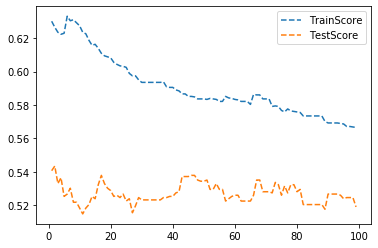

In [24]:
plt.plot(para_leaf, train_score, linestyle = '--', label = 'TrainScore' )
plt.plot(para_leaf, test_score, linestyle = '--', label = 'TestScore' )
plt.legend()

In [25]:
train_score = []; test_score=[]

para_split = [n_split * 10 for  n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state = 1234, min_samples_leaf =47,\
                                 min_samples_split = v_min_samples_split,max_depth=9)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,10,0.585,0.538
1,20,0.585,0.538
2,30,0.585,0.538
3,40,0.585,0.538
4,50,0.585,0.538
5,60,0.585,0.538
6,70,0.585,0.538
7,80,0.585,0.538
8,90,0.585,0.538
9,100,0.584,0.534


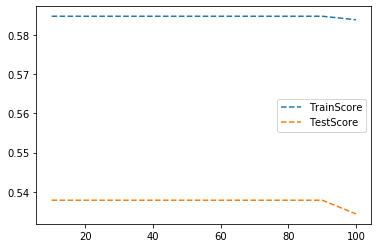

In [26]:
plt.plot(para_split, train_score, linestyle = '--', label = 'TrainScore' )
plt.plot(para_split, test_score, linestyle = '--', label = 'TestScore' )
plt.legend()

In [27]:
tree_final = DecisionTreeClassifier(min_samples_leaf = 47, max_depth = 9, random_state = 1234)
tree_final.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))


Score on training set: 0.585
Score on test set: 0.538


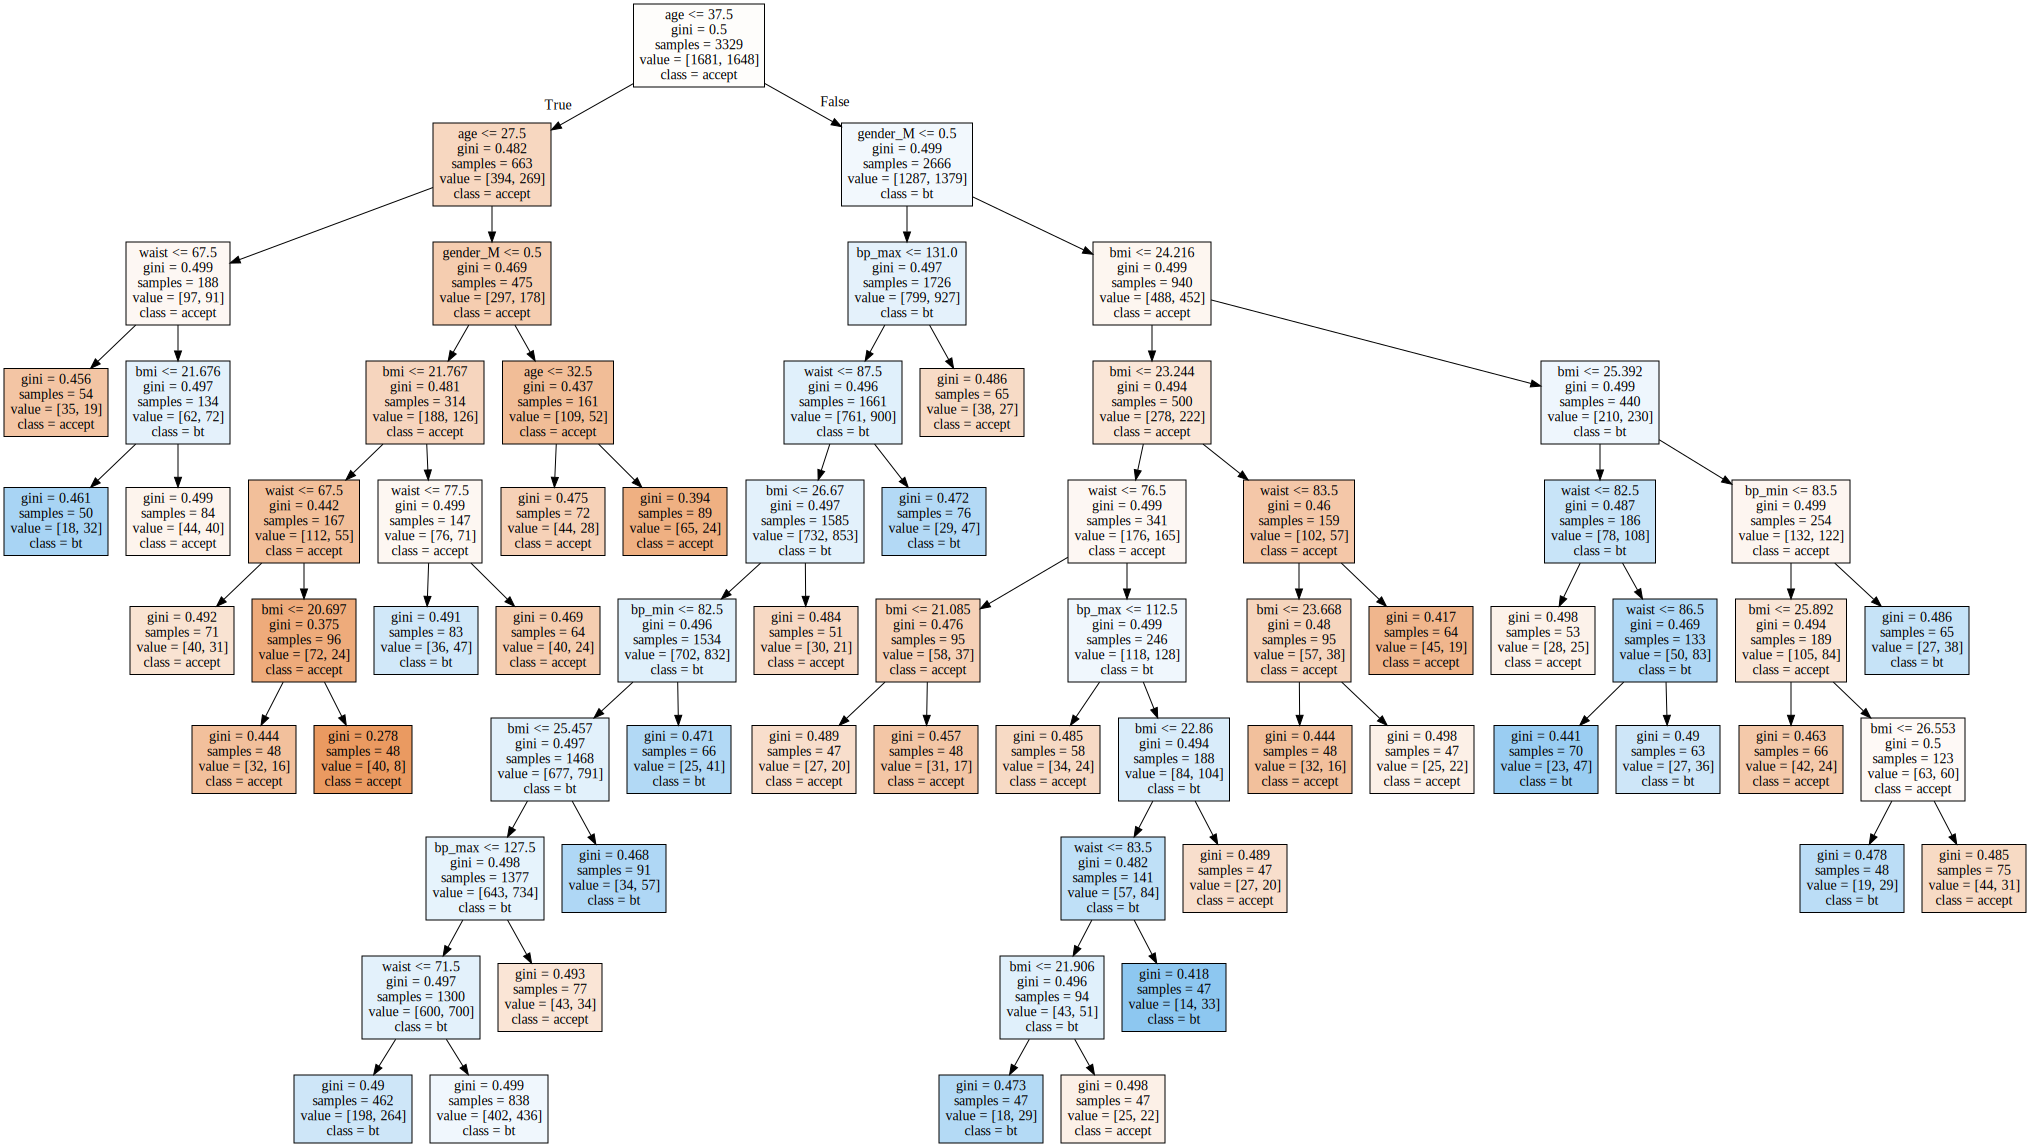

'dtree_render.png'

In [28]:
v_feature_name = df_train_x.columns

export_graphviz(tree_final, out_file = 'tree_finalDecisionTreeClassifier.dot', class_names = ['accept','bt'],
               feature_names = v_feature_name, impurity = True, filled = True)
with open('tree_finalDecisionTreeClassifier.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))
graph = graphviz.Source(dot_graph)
graph.format='png'
graph.render('dtree_render', view = True)

In [29]:
y_pred = svc_final.predict(df_test_x)
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

0

In [30]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
1,bmi,0.350
2,waist,0.239
0,age,0.236
6,gender_M,0.069
4,bp_max,0.068
3,bp_min,0.037
5,gender_F,0.000


Text(0, 0.5, 'variable')

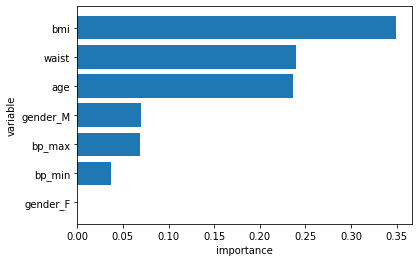

In [31]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('importance')
plt.ylabel('variable')